# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Correlation r values
Absolute value of r
Strength of relationship
r < 0.25	No relationship
0.25 < r < 0.5	Weak relationship
0.5 < r < 0.75	Moderate relationship
r > 0.75	Strong relationship

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(query_url)

# Empty list to hold records
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

record_index = 0
set_index = 1

print("Beginning Data Retrieval")
print("-"*30)

for city in cities:
     try:
        response = requests.get(query_url + city).json()
        time.sleep(0.3)
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if record_index == 50:
            record_index = 0
            set_index += 1
        else:
            record_index += 1
        
        print(f"Processing Record {record_index} of Set {set_index} | {city} ")
    
     except(KeyError):
            print("City not found, Skipping...")
    

http://api.openweathermap.org/data/2.5/weather?appid=647403f832492c941542fba79d73dfd6&units=imperial&q=
Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | oistins 
Processing Record 2 of Set 1 | cape town 
Processing Record 3 of Set 1 | sampit 
Processing Record 4 of Set 1 | barrow 
Processing Record 5 of Set 1 | creel 
Processing Record 6 of Set 1 | cedar city 
Processing Record 7 of Set 1 | tacoronte 
Processing Record 8 of Set 1 | bundaberg 
City not found, Skipping...
Processing Record 9 of Set 1 | beringovskiy 
Processing Record 10 of Set 1 | gidole 
Processing Record 11 of Set 1 | sijunjung 
Processing Record 12 of Set 1 | saint-louis 
Processing Record 13 of Set 1 | arraial do cabo 
City not found, Skipping...
Processing Record 14 of Set 1 | langsa 
Processing Record 15 of Set 1 | saskylakh 
Processing Record 16 of Set 1 | baykit 
City not found, Skipping...
Processing Record 17 of Set 1 | hithadhoo 
City not found, Skipping...
Processing Reco

Processing Record 28 of Set 4 | biak 
Processing Record 29 of Set 4 | djambala 
Processing Record 30 of Set 4 | lata 
Processing Record 31 of Set 4 | los llanos de aridane 
Processing Record 32 of Set 4 | hualmay 
Processing Record 33 of Set 4 | whitianga 
City not found, Skipping...
Processing Record 34 of Set 4 | ola 
Processing Record 35 of Set 4 | buckingham 
Processing Record 36 of Set 4 | rio gallegos 
Processing Record 37 of Set 4 | gejiu 
Processing Record 38 of Set 4 | moose factory 
Processing Record 39 of Set 4 | rocha 
Processing Record 40 of Set 4 | mehndawal 
Processing Record 41 of Set 4 | faanui 
Processing Record 42 of Set 4 | jinchang 
Processing Record 43 of Set 4 | ballangen 
Processing Record 44 of Set 4 | puerto del rosario 
Processing Record 45 of Set 4 | hastings 
Processing Record 46 of Set 4 | lebu 
Processing Record 47 of Set 4 | tasiilaq 
City not found, Skipping...
Processing Record 48 of Set 4 | kruisfontein 
Processing Record 49 of Set 4 | mugla 
Processi

Processing Record 11 of Set 8 | rajnagar 
Processing Record 12 of Set 8 | saint-pierre 
Processing Record 13 of Set 8 | jiaocheng 
Processing Record 14 of Set 8 | aviles 
Processing Record 15 of Set 8 | gull lake 
City not found, Skipping...
Processing Record 16 of Set 8 | odda 
Processing Record 17 of Set 8 | alofi 
Processing Record 18 of Set 8 | presidencia roque saenz pena 
Processing Record 19 of Set 8 | bonavista 
Processing Record 20 of Set 8 | lucapa 
Processing Record 21 of Set 8 | the valley 
Processing Record 22 of Set 8 | urengoy 
Processing Record 23 of Set 8 | kjollefjord 
Processing Record 24 of Set 8 | bandarbeyla 
Processing Record 25 of Set 8 | norman wells 
Processing Record 26 of Set 8 | kurayoshi 
Processing Record 27 of Set 8 | viedma 
Processing Record 28 of Set 8 | bua yai 
Processing Record 29 of Set 8 | kralendijk 
Processing Record 30 of Set 8 | atar 
Processing Record 31 of Set 8 | bilma 
Processing Record 32 of Set 8 | chilmari 
Processing Record 33 of Set 

City not found, Skipping...
Processing Record 39 of Set 11 | poya 
Processing Record 40 of Set 11 | wasilla 
Processing Record 41 of Set 11 | ciudad bolivar 
Processing Record 42 of Set 11 | seewalchen 
Processing Record 43 of Set 11 | bathsheba 
Processing Record 44 of Set 11 | fortuna 
City not found, Skipping...
Processing Record 45 of Set 11 | weligama 
Processing Record 46 of Set 11 | mormugao 
Processing Record 47 of Set 11 | rodrigues alves 
City not found, Skipping...
Processing Record 48 of Set 11 | hambantota 
Processing Record 49 of Set 11 | galveston 
City not found, Skipping...
City not found, Skipping...
Processing Record 50 of Set 11 | mozarlandia 
City not found, Skipping...
Processing Record 0 of Set 12 | margate 
Processing Record 1 of Set 12 | solnechnyy 
Processing Record 2 of Set 12 | sioux lookout 
Processing Record 3 of Set 12 | nhulunbuy 
Processing Record 4 of Set 12 | wote 
Processing Record 5 of Set 12 | mao 
Processing Record 6 of Set 12 | leningradskiy 
Pro

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dataframe
city_data = pd.DataFrame({
    "City": city_name, 
    "Lat": lat, 
    "Lng": long, 
    "Max temp": max_temp, 
    "Humidity": humidity, 
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed, 
    "Country": country, 
    "Date": date,
})

# Export to csv
city_data.to_csv("city_data.csv", index=False, header=True)
# Display dataframe
city_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oistins,13.0667,-59.5333,77.09,83,40,13.80,BB,1643697694
1,Cape Town,-33.9258,18.4232,76.10,69,0,1.99,ZA,1643697546
2,Sampit,-2.5333,112.9500,94.08,42,71,3.38,ID,1643697695
3,Barrow,71.2906,-156.7887,-12.98,77,100,5.75,US,1643697695
4,Creel,27.7500,-107.6333,33.01,64,44,2.59,MX,1643697696


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [7]:
# Describe data to check if we have a Max humidity of 100%
# Display
city_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,20.989846,16.841539,48.835477,72.308492,57.571924,7.961698,1.643698e+09
std,34.279861,89.892068,31.575530,21.117359,42.179372,6.246703,1.146617e+02
min,-54.800000,-175.200000,-32.850000,9.000000,0.000000,0.000000,1.643697e+09
25%,-8.103000,-63.549700,24.580000,62.000000,7.000000,3.470000,1.643698e+09
50%,26.812500,20.916700,57.870000,77.000000,75.000000,6.220000,1.643698e+09
75%,50.699600,93.950000,75.220000,88.000000,100.000000,10.850000,1.643698e+09
max,78.218600,179.316700,96.820000,100.000000,100.000000,41.050000,1.643698e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
max_humidity = city_data.index[city_data["Humidity"] == 100]
max_humidity

Int64Index([14, 67, 89, 96, 149, 165, 313, 417, 498, 529, 543], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(max_humidity, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oistins,13.0667,-59.5333,77.09,83,40,13.80,BB,1643697694
1,Cape Town,-33.9258,18.4232,76.10,69,0,1.99,ZA,1643697546
2,Sampit,-2.5333,112.9500,94.08,42,71,3.38,ID,1643697695
3,Barrow,71.2906,-156.7887,-12.98,77,100,5.75,US,1643697695
4,Creel,27.7500,-107.6333,33.01,64,44,2.59,MX,1643697696


In [10]:
clean_city_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.539261,16.900166,49.387332,71.770318,57.362191,8.032951,1.643698e+09
std,34.198035,90.037571,31.174793,20.962003,42.262072,6.272932,1.141808e+02
min,-54.800000,-175.200000,-32.850000,9.000000,0.000000,0.000000,1.643697e+09
25%,-8.348775,-63.728125,24.695000,61.250000,6.250000,3.522500,1.643698e+09
50%,25.270550,20.830700,58.660000,76.000000,75.000000,6.275000,1.643698e+09
75%,50.252225,93.920825,75.622500,88.000000,100.000000,10.890000,1.643698e+09
max,78.218600,179.316700,96.820000,99.000000,100.000000,41.050000,1.643698e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.
max_humidity = city_data.index[city_data["Humidity"] == 100]
max_humidity

Int64Index([14, 67, 89, 96, 149, 165, 313, 417, 498, 529, 543], dtype='int64')

In [12]:
clean_city_data = city_data.drop(max_humidity, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oistins,13.0667,-59.5333,77.09,83,40,13.80,BB,1643697694
1,Cape Town,-33.9258,18.4232,76.10,69,0,1.99,ZA,1643697546
2,Sampit,-2.5333,112.9500,94.08,42,71,3.38,ID,1643697695
3,Barrow,71.2906,-156.7887,-12.98,77,100,5.75,US,1643697695
4,Creel,27.7500,-107.6333,33.01,64,44,2.59,MX,1643697696


In [13]:
clean_city_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.539261,16.900166,49.387332,71.770318,57.362191,8.032951,1.643698e+09
std,34.198035,90.037571,31.174793,20.962003,42.262072,6.272932,1.141808e+02
min,-54.800000,-175.200000,-32.850000,9.000000,0.000000,0.000000,1.643697e+09
25%,-8.348775,-63.728125,24.695000,61.250000,6.250000,3.522500,1.643698e+09
50%,25.270550,20.830700,58.660000,76.000000,75.000000,6.275000,1.643698e+09
75%,50.252225,93.920825,75.622500,88.000000,100.000000,10.890000,1.643698e+09
max,78.218600,179.316700,96.820000,99.000000,100.000000,41.050000,1.643698e+09


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

(-100.0, 100.0)

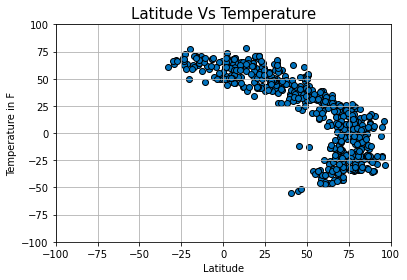

In [22]:
# Set variables
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max temp"]
plt.scatter(y_axis, x_axis, marker="o", facecolors='#0072BD', edgecolors="black", alpha=1)

plt.title("Latitude Vs Temperature",fontsize =15)
plt.xlabel("Latitude")
plt.ylabel("Temperature in F")
plt.grid()
plt.xlim(-100, 100)
plt.ylim(-100, 100)

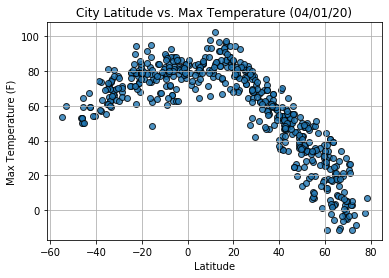

## Latitude vs. Humidity Plot

(0.0, 100.0)

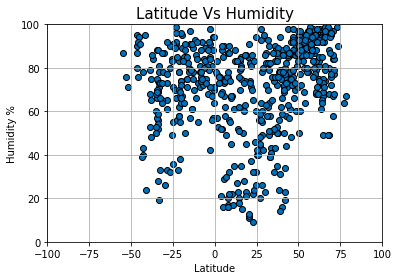

In [27]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors='#0072BD', edgecolors="black", alpha=1)

plt.title("Latitude Vs Humidity",fontsize =15)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.xlim(-100, 100)
plt.ylim(0, 100)

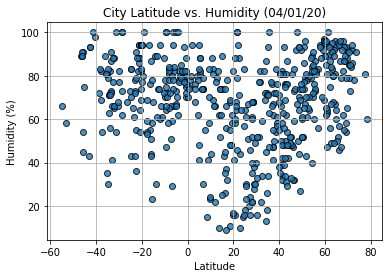

## Latitude vs. Cloudiness Plot

(-10.0, 110.0)

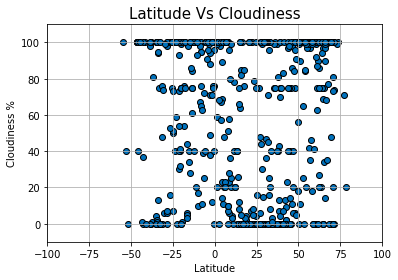

In [31]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors='#0072BD', edgecolors="black", alpha=1)

plt.title("Latitude Vs Cloudiness",fontsize =15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.xlim(-100, 100)
plt.ylim(-10, 110)

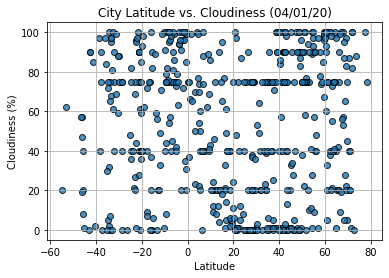

## Latitude vs. Wind Speed Plot

(-10.0, 50.0)

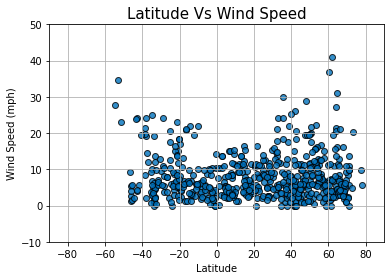

In [35]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors='#0072BD', edgecolors="black", alpha=0.80)

plt.title("Latitude Vs Wind Speed",fontsize =15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim(-90, 90)
plt.ylim(-10, 50)

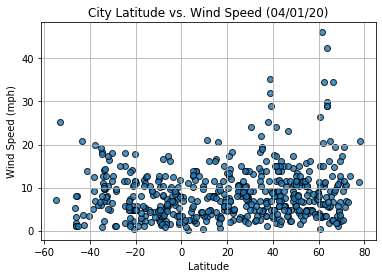

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

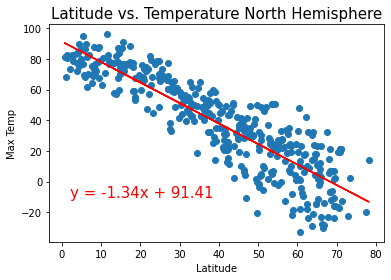

The r-value is -0.883154546084469


In [36]:
# Calculate the correlation coefficient and linear regression model 
# Put northern lats and temp on variables
north_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

# Set x and y values using the previous steps variables
x_axis = north_df["Lat"]
y_axis = north_df["Max temp"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(2,-10),fontsize=15,color="red")
plt.title("Latitude vs. Temperature North Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")

In [ ]:
#It is evident a strong negative correlation between Max Temp and latitude  for North Hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

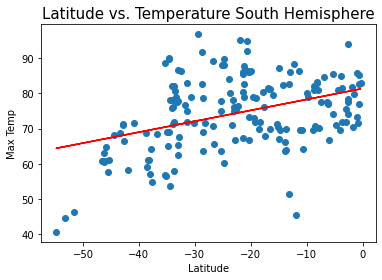

The r-value is 0.39521496802306794


In [37]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Set x and y values using the previous steps variables
x_axis = south_df["Lat"]
y_axis = south_df["Max temp"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.title("Latitude vs. Temperature South Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")

In [ ]:
#It is evident a weak positive correlation between Max Temp and latitude for South Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

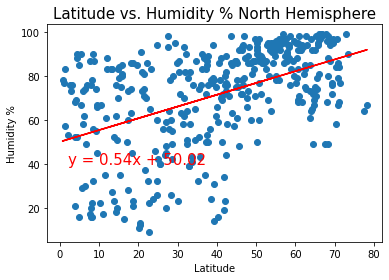

The r-value is 0.48131478555455853


In [38]:
north_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

# Set x and y values using the previous steps variables
x_axis = north_df["Lat"]
y_axis = north_df["Humidity"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(2,40),fontsize=15,color="red")
plt.title("Latitude vs. Humidity % North Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")

In [ ]:
#It is evident a weak positive correlation between Humidity and latitude  for North Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

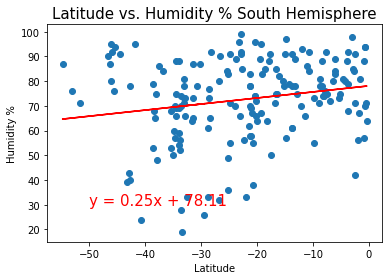

The r-value is 0.19595502075983304


In [39]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Set x and y values using the previous steps variables
x_axis = south_df["Lat"]
y_axis = south_df["Humidity"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title("Latitude vs. Humidity % South Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")

In [ ]:
#There is not evident correlation between Humidity and latitude for South Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

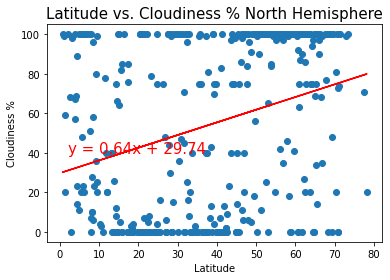

The r-value is 0.3022394457341643


In [40]:
north_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

# Set x and y values using the previous steps variables
x_axis = north_df["Lat"]
y_axis = north_df["Cloudiness"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(2,40),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness % North Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")

The r-value is: 0.0020898727664228514


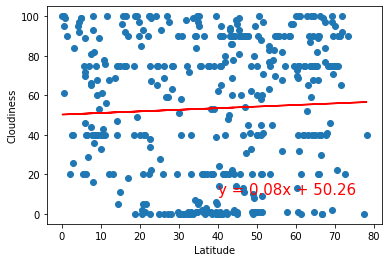

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

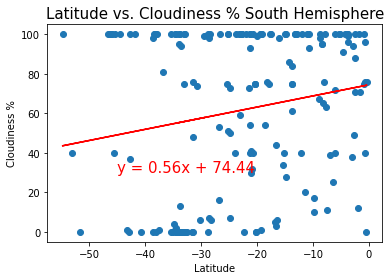

The r-value is 0.18817903728746294


In [41]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Set x and y values using the previous steps variables
x_axis = south_df["Lat"]
y_axis = south_df["Cloudiness"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness % South Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")

The r-value is: 0.0035263772085582894


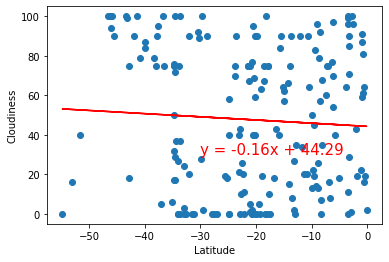

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

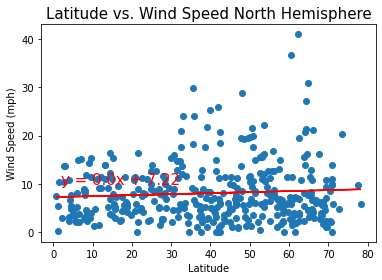

The r-value is 0.06958150012620594


In [42]:
north_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

# Set x and y values using the previous steps variables
x_axis = north_df["Lat"]
y_axis = north_df["Wind Speed"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(2,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed North Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")

The r-value is: 0.04019723576144484


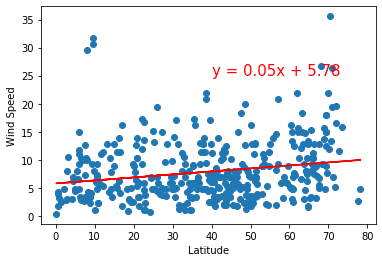

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

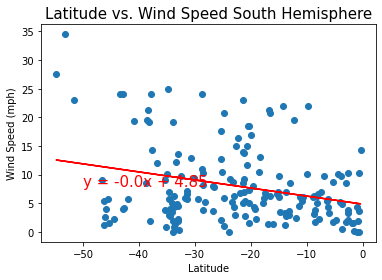

The r-value is -0.28047499366181333


In [43]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Set x and y values using the previous steps variables
x_axis = south_df["Lat"]
y_axis = south_df["Wind Speed"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed South Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")

The r-value is: 0.017128274759839232


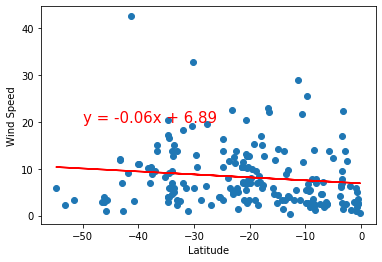